In [2]:
# Importing wine dataset

import pandas as pd
df=pd.read_csv("wine.csv")

In [3]:
# To check if my model has imported properly

df.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


In [4]:
# Importing linear regression algorithm

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [44]:
# Fitting the model with dependant and independant variable

linreg.fit(pd.DataFrame(df.iloc[:,[2,3,4,5]]),df['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
# Intercept is also known as constant. If all the x values tends to zero. Intercept is the expected value for y. (i.e)y = mx + c


linreg.intercept_

-3.4299801869286615

In [46]:
# This decribes the relation between independant variable and dependant variable. How much times the x will give the y.

linreg.coef_

array([ 0.00107551,  0.60720935, -0.00397153,  0.02393083])

In [47]:
# Creating a new column and appending to the existing dataset with the predicted value for average area income using 
# the predict function.

df['predicted']=linreg.predict(pd.DataFrame(df.iloc[:,[2,3,4,5]]))
df.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop,predicted
0,1952,7.4950,600,17.1167,160,31,43183.569,7.715154
1,1953,8.0393,690,16.7333,80,30,43495.030,7.872937
2,1955,7.6858,502,17.1500,130,28,44217.857,7.677328
3,1957,6.9845,420,16.1333,110,26,45152.252,7.003355
4,1958,6.7772,582,16.4167,187,25,45653.805,7.019932


In [48]:
# TSS - total sum of squares, Summation of difference between each price and mean of price

a=df["Price"].mean()
print(a)
tss=sum((df["Price"] - a)**2)
tss

7.0672239999999995


10.1506377256

In [49]:
# sse - sum of squared error, summation of difference between predicted value and existing price

sse=((sum((df['predicted']-df['Price'])**2)))
sse

1.740162201384983

In [59]:
# This is R-squared value which represents how close the data is fitted to the linear regression line. 
# We can also refer this as accuracy

r1=round(1-(sse/tss),3)
r1

0.829

In [51]:
# It gives the percentage of error from the actual value


import numpy as np
mape=np.mean(abs((df['Price']-df['predicted'])/df['Price']))
print(mape)

0.03253328158447267


# For P Value

In [88]:
# Importing OLS model

import statsmodels.formula.api as sm
import scipy,scipy.stats
from statsmodels.api import add_constant
x=df.iloc[:,[3,4,5,6,7]]
y=df["Price"]

x2=add_constant(x)
lm=sm.OLS(y,x2)
lm=lm.fit()

In [89]:
# This gives a detailed summary statistics of the OLS model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     18.47
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           1.04e-06
Time:                        15:56:35   Log-Likelihood:                -2.1043
No. Observations:                  25   AIC:                             16.21
Df Residuals:                      19   BIC:                             23.52
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.8743      9.821      0.293      

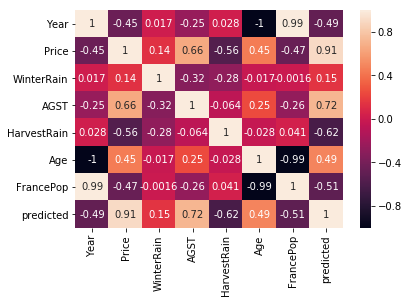

In [90]:
# Using heatmap the correlation between each independant variable is known 

import seaborn as sns
sns.heatmap(data=df.corr(),annot=True)

In [91]:
# VIF factor gives the multi collinearity between each of the independant variable

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [92]:
vif.round(1)

,VIF Factor,features
0,5740.6,AGST
1,41.9,HarvestRain
2,27.7,Age
3,566.3,FrancePop
4,3299.9,predicted
